# Project 1 by Kristen Villanueva

# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer. The order_id seems to have no value to the dataset. The customer_id should be explored to see how often each restaurant is being ordered from, i.e. if there are specific restaurants that are ordered from more often then others. Cuisine_type can add insight to which cuisines are making better sales in the area. The cost_of_the_order column is showing us how much is being spent on each order, which could offer insights on cost analysis. The next column day_of_the_week is only showing whether the order was placed on a weekday or weekend, which could help us determine if people are more likely to order after or during work when cooking is more of a hassle or if more people are ordering while relaxing on the weekend. The rating column shows something interesting in that some answers were "not given" which will have to be dealt with when doing EDA. The food_preparation_time and delivery_time will be able to be compared to the other columns to see what is taking some orders longer then others.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:
# Write your code here
df.shape

(1898, 9)

#### Observations:
There are 1898 rows and 9 columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [5]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
Of the nine columns there were no "null" values which sounds great, but previous code showed us that there are "not given" values in the rating column which should be treated as null. The one float64 column is the cost_of_the_order which makes sense as the service is in NYC so we can guess that the numbers given are in US Dollars which matches the format of the float64 data type. The four int64 datatype columns are the four other numerical columns, order_id, customer_id, food_preparation_time in minutes, and delivery_time in minutes. I would not expect those numbers to have decimals in them so it makes sense that they are interger type. The remaining four columns show as object datatype which means these columns are most likely descriptions.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [6]:
# Verifying that there are no missing values
df.isnull().sum().sort_values(ascending=False)

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
Technically there are no missing values, but as seen previously more attention needs to be paid to the ratings column do to the "not rated" seen in the df.head() line of code above.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [7]:
# Using the .describe function to get some basic mathematical information
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:
From the table produced by the df.describe() function the minimum time for an order to be prepared is 20 minutes, the average time or mean is 27.371970 minutes or roughly 27 minutes and 22 seconds, while the maximum time taken to prepare an order is 35 minutes.

### **Question 5:** How many orders are not rated? [1 mark]

In [8]:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
Of the 1898 total orders 736 of them or appoximately 39% of the total orders did not give a rating. That is a large chunk of the data set without a rating.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [9]:
# Checking the number of unique data points in each column
df.nunique()

order_id                 1898
customer_id              1200
restaurant_name           178
cuisine_type               14
cost_of_the_order         312
day_of_the_week             2
rating                      4
food_preparation_time      16
delivery_time              19
dtype: int64

#### Observations:
This line of code tell us that every entry in the column order_id is a different number which makes sense as there should not be duplicate order numbers, but it also makes this column useless. The customer_id column shows that we have 1200 different customers that have made 1898 total orders so there are return customers. There are 178 different rastaurants spanning 14 different cusines. Thre are 312 different costs, but that doesnt mean much yet. There are only 2 days of the week which we already know are weekday and weekend. There are 4 different ratings given. The food prep and delivery times haveing 16 and 19 uniques values mean that there will be quite a few duplicates. 

#### For column order_id

In [10]:
# Using the describe function to get a quick visual aid for this column.
df['order_id'].describe()

count    1.898000e+03
mean     1.477496e+06
std      5.480497e+02
min      1.476547e+06
25%      1.477021e+06
50%      1.477496e+06
75%      1.477970e+06
max      1.478444e+06
Name: order_id, dtype: float64

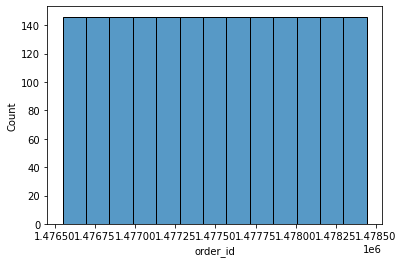

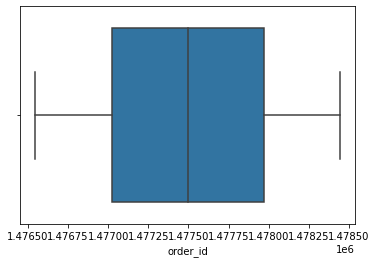

In [11]:
# Histplot and Boxpot on column order_id 
sns.histplot(data=df,x='order_id')
plt.show()
sns.boxplot(data=df,x='order_id')
plt.show()

#### Observations:
The order_id column does not really offer any valuable insight except that the order numbers range from 1465470 to 1478444 for this dataset. There are no duplicated values so this column could likely be dropped as it does not effectively add anything to the dataset or offer insight when viewed against the other columns.

#### For column customer_id

In [12]:
# Getting the value_counts() to determine the customer_id's that have made the most orders.
df['customer_id'].value_counts()

52832     13
47440     10
83287      9
250494     8
65009      7
          ..
66393      1
142170     1
332635     1
147519     1
385023     1
Name: customer_id, Length: 1200, dtype: int64

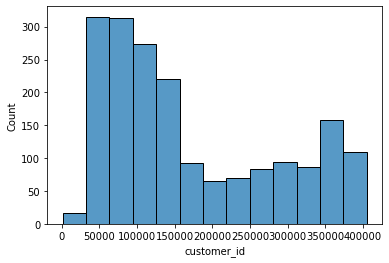

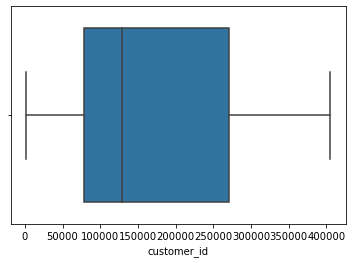

In [13]:
# Histplot and Boxpot on column customer_id 
sns.histplot(data=df,x='customer_id')
plt.show()
sns.boxplot(data=df,x='customer_id')
plt.show()

#### Observations:
There are duplicate values in the customer_id column showing that some customers have made multiple purchases. These customers can be compaired against other customers to look for traits that might indicate why some customers are repeat customers and inversely what traits were present for non returning customers. The customer ID numbers do not really show much on their own. 

#### For column restaurant_name

In [14]:
# Getting the value_counts() to determine the restaurant_name's that are ordered from the most.
df['restaurant_name'].value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sarabeth's West                1
Dig Inn Seasonal Market        1
Coppola's East                 1
Socarrat Paella Bar            1
Sushi Choshi                   1
Name: restaurant_name, Length: 178, dtype: int64

C:\Users\krene\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 140 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\krene\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\krene\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 140 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\krene\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 142 missing from current font.
  font.set_text(s, 0, flags=flags)


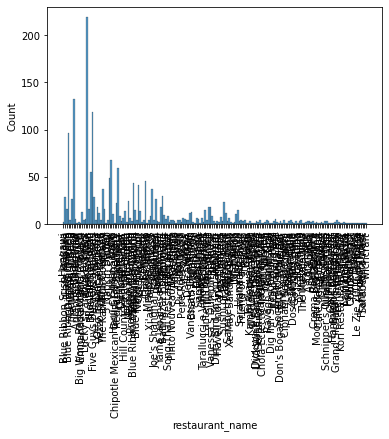

In [15]:
# Histplot and Boxpot on column restaurant_name 
sns.histplot(data=df,x='restaurant_name')
plt.xticks(rotation = 90)
plt.show()


#### Observations:
The graph attached does not show the data very well, but that is because there are so many different variables in this column. I was able to ascertain the top five restaruants ordered from, Shake Shack with 219 orders, The Meatball Shop with 132 orders, Blue Ribbon Sushi with 119 orders, Blue Ribbon Fried Chicken with 96 orders, and Parm with 68 orders.

#### For column cuisine_type

In [16]:
# Getting the value_counts() to determine the cuisines that are most popular.
df['cuisine_type'].value_counts()

American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

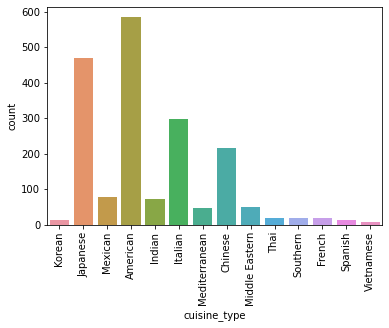

In [17]:
# Using a countplot to show this information.
sns.countplot(data=df,x='cuisine_type')
plt.xticks(rotation = 90)

#### Observations:
American food is the most popular cuisine, followed by Japanese, Italian, and Chinese. The rest of the cuisine types all fall below 100 orders. 

#### For column cost_of_the_order

In [18]:
# Using the describe function to get a quick visual aid for this column.
df['cost_of_the_order'].describe()

count    1898.000000
mean       16.498851
std         7.483812
min         4.470000
25%        12.080000
50%        14.140000
75%        22.297500
max        35.410000
Name: cost_of_the_order, dtype: float64

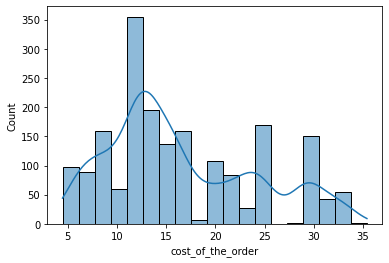

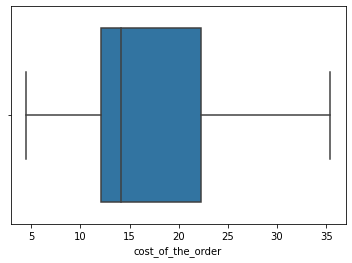

In [19]:
# Histplot and Boxpot on column cost_of_the_order 
sns.histplot(data=df,x='cost_of_the_order',kde=True)
plt.show()
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()

#### Observations:
The order cost is skewed slightly to the right. The average cost is 16.50 and the median cost is 14.14.

#### For column day_of_the_week

In [20]:
# Getting the value_counts() to determine the cuisines that are most popular.
df['day_of_the_week'].value_counts()

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

<AxesSubplot:xlabel='day_of_the_week', ylabel='count'>

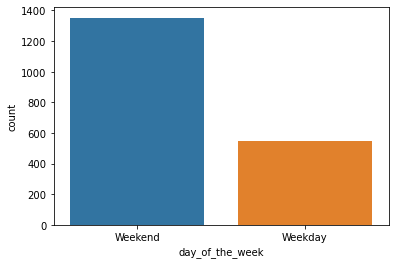

In [21]:
# Using a seaborn countplot to show this categorical information.
sns.countplot(data=df,x='day_of_the_week')

#### Observations:
There are over double the amount of orders on weekdays on the weekends. This is showing that weekends are better for business overall, but does not show if it is better for each restaurant.

#### For column rating

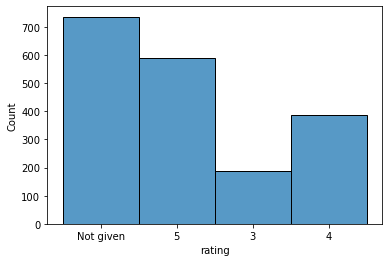

In [22]:
# Histplot and Boxpot on column rating 
sns.histplot(data=df,x='rating')
plt.show()

#### Observations:
Over 700 orders did not get ratings. Just under 600 got a rating of 5, around 400 got a rating of 4 and around 200 got a rating of 3. There were no entries for 0, 1, or 2. 

#### For column food_preparation_time

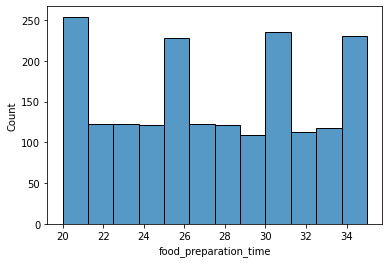

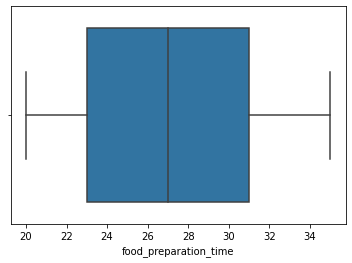

In [23]:
# Histplot and Boxpot on column food_preparation_time 
sns.histplot(data=df,x='food_preparation_time')
plt.show()
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

#### Observations:
Food preparation time did not have skewed data. The highest counts of times were spaced fairly evenly with lower counts inbetween.

#### For column delivery_time

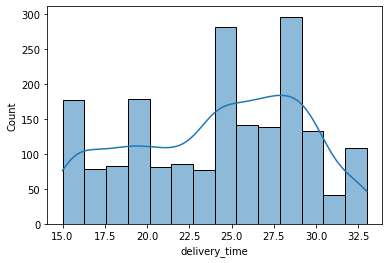

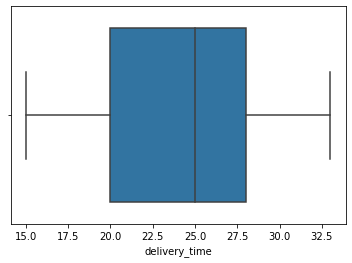

In [24]:
# Histplot and Boxpot on column delivery_time 
sns.histplot(data=df,x='delivery_time', kde=True)
plt.show()
sns.boxplot(data=df,x='delivery_time')
plt.show()

#### Observations:
Food delivery times are skewed ever so slightly to the left. The median time was just under 25 minutes for deliery.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [25]:
# I copied this code from my univariate analaysis above.
df['restaurant_name'].value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sarabeth's West                1
Dig Inn Seasonal Market        1
Coppola's East                 1
Socarrat Paella Bar            1
Sushi Choshi                   1
Name: restaurant_name, Length: 178, dtype: int64

#### Observations:
The top five restaruants ordered from, Shake Shack with 219 orders, The Meatball Shop with 132 orders, Blue Ribbon Sushi with 119 orders, Blue Ribbon Fried Chicken with 96 orders, and Parm with 68 orders.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

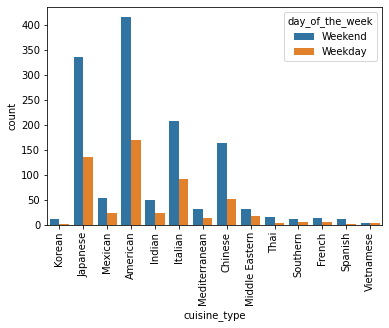

In [26]:
# Using a countplot on the cuisine_type column but adding a hue using the day_of_the_week column.
sns.countplot(data=df,x='cuisine_type',hue='day_of_the_week')
plt.xticks(rotation = 90)

#### Observations:
The most popular cuisine on weekends is American.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [27]:
percentage = df.loc[df['cost_of_the_order'] > 20,'cost_of_the_order'].count()/df['cost_of_the_order'].count()
percentage*100

29.24130663856691

#### Observations:
29.24% of orders cost more than 20 dollars.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [28]:
df['delivery_time'].mean()

24.161749209694417

#### Observations:
The average delivery time is 24.16 minutes or approximately 24 minutes 10 seconds.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [29]:
# Copied from above. Getting the value_counts() to determine the customer_id's that have made the most orders.
df['customer_id'].value_counts()

52832     13
47440     10
83287      9
250494     8
65009      7
          ..
66393      1
142170     1
332635     1
147519     1
385023     1
Name: customer_id, Length: 1200, dtype: int64

#### Observations:
Customer 52832 had the most orders placed with 13, followed by customer 47440 with 10, and the third highest was customer 83287 with 9 orders placed.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


#### Using a heatmap to compare all numerical variables

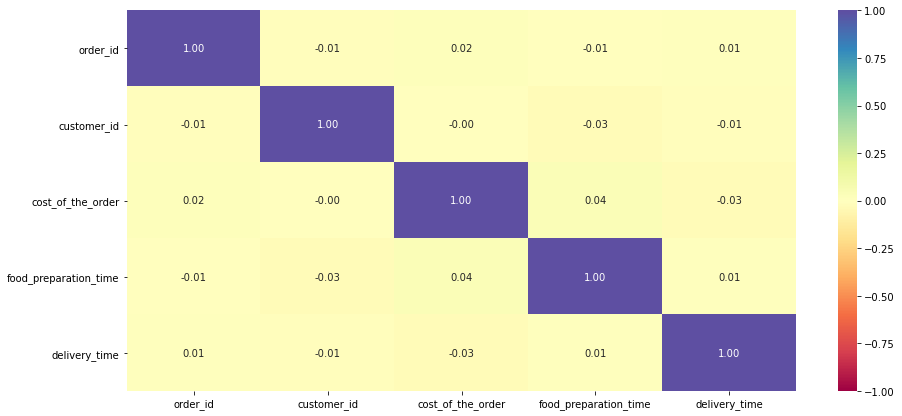

In [30]:
# Adding numerical variables from the dataset to plot a heatmap of the correlation between variables.
numvar = ['order_id','customer_id','cost_of_the_order','food_preparation_time','delivery_time']

corr = df[numvar].corr()

# Plotting a heatmap to compare numerical variables

plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### Observations:
There is very little correlation between the numerical columns. This heatmap only shows -0.01 to -0.04 correlation which is not very strong.

#### Using a pairplot to try and gain more insight.

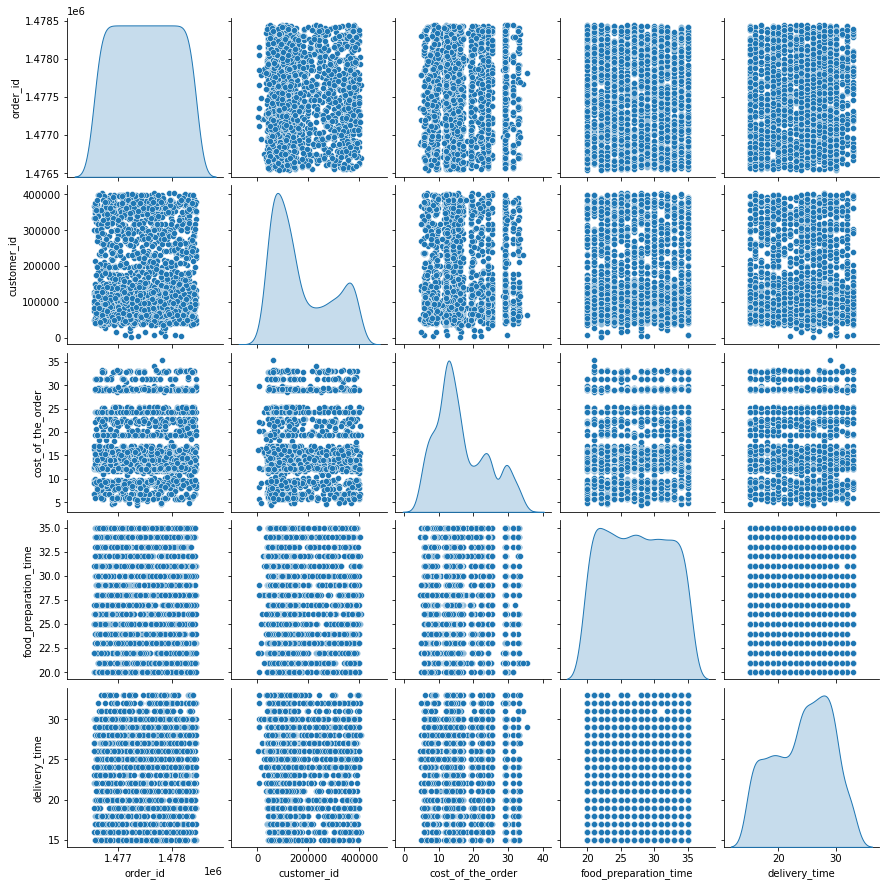

In [31]:
# Using numvar from the heatmap to print a pairplot
sns.pairplot(data=df[numvar], diag_kind="kde")
plt.show()

#### Observations:
The pairplot confirms the lack of correlation in the numerical data. Taking a deeper dive into the variables will be next.

#### Comparing variables versus cost of order.

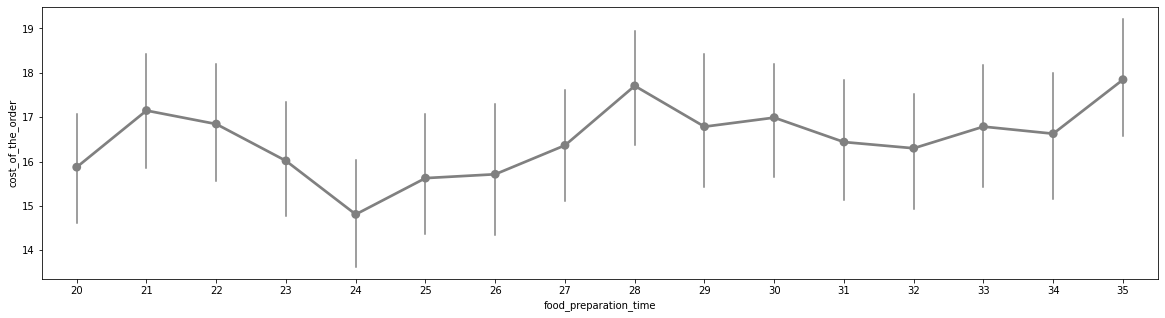

In [32]:
# Using a pointplot to compare order cost versus prep time
plt.figure(figsize=(20, 5))
sns.pointplot(
    x="food_preparation_time", y="cost_of_the_order", data=df, color="gray", errwidth=1.5
)
plt.show()

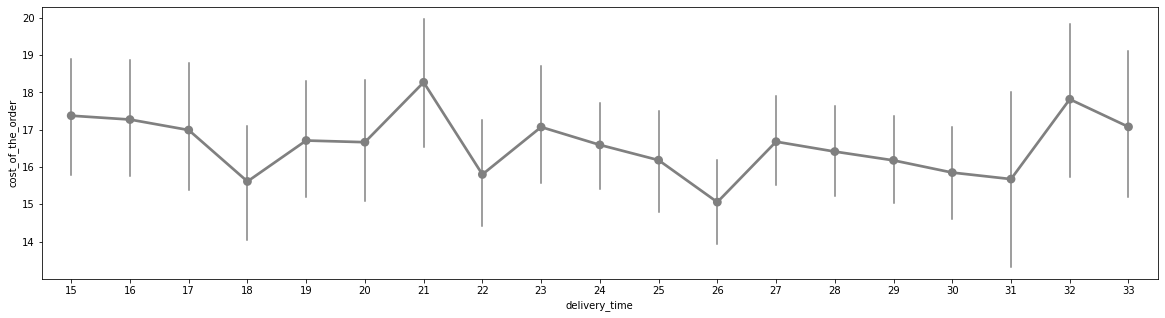

In [33]:
# Using a pointplot to compare order cost versus prep time
plt.figure(figsize=(20, 5))
sns.pointplot(
    x="delivery_time", y="cost_of_the_order", data=df, color="gray", errwidth=1.5
)
plt.show()

#### Observations:
The cost of the orders did not seem to effect prep time or delivery time.

#### Comparing variables versus cuisine type.

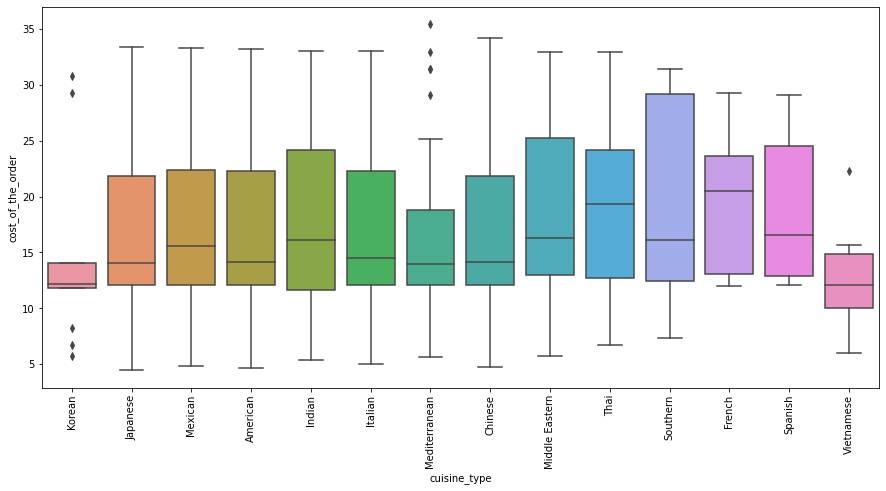

In [34]:
#Making a boxplot to compare cuisine type vs cost
plt.figure(figsize=(15,7))
sns.boxplot(x=df['cuisine_type'], y=df['cost_of_the_order'])
plt.ylabel('cost_of_the_order')
plt.xlabel('cuisine_type')
plt.xticks(rotation=90)
plt.show()

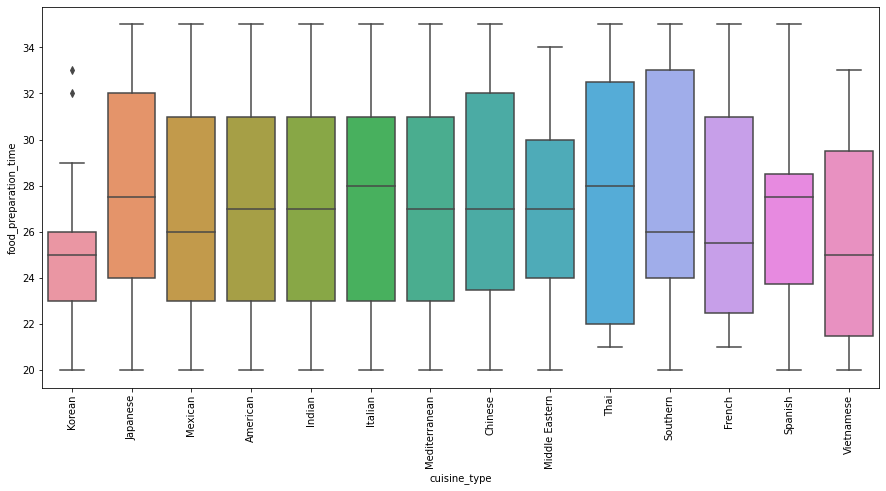

In [35]:
#Making a boxplot to compare cuisine type vs prep time
plt.figure(figsize=(15,7))
sns.boxplot(x=df['cuisine_type'], y=df['food_preparation_time'])
plt.ylabel('food_preparation_time')
plt.xlabel('cuisine_type')
plt.xticks(rotation=90)
plt.show()

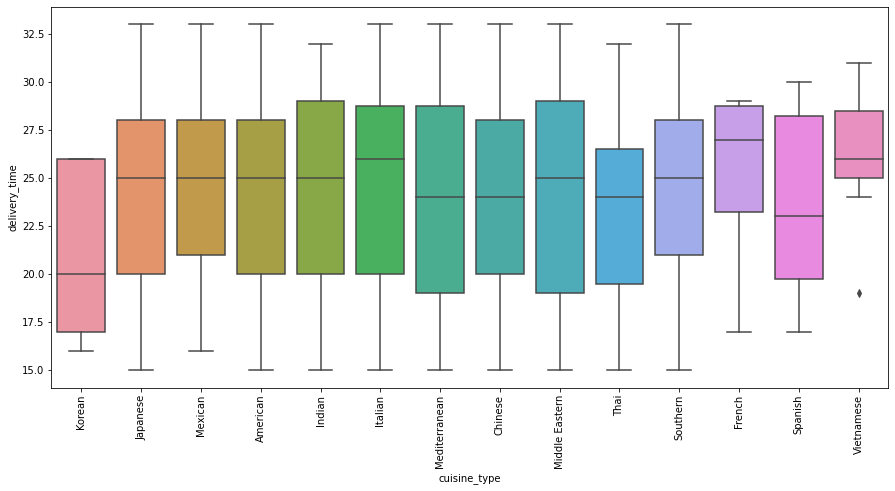

In [36]:
#Making a boxplot to compare cuisine type vs delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x=df['cuisine_type'], y=df['delivery_time'])
plt.ylabel('delivery_time')
plt.xlabel('cuisine_type')
plt.xticks(rotation=90)
plt.show()

#### Observations:
Judged on median price the most expensive types of cuisine are French and Thai, while the cheapest are Korean and Vietnamese. Korean seems to have the most outliers. Southern has the largest cost range between the 25th and 75th percentiles, while Chinese had the largest cost range overall. Thai, Italian, and Japanese had the highest median prep time and Korean and Vietnamese have the lowest. The median delivery time was highest for French, Vietnamese, and Italian. Spanish and Korean were the lowest in delivery time.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [37]:
# drop the 'Not given' rows from the rating column
q13_1 = df[df['rating'] != 'Not given'].copy()

# change the rating column to type int
q13_1['rating'] = q13_1['rating'].astype('int')

# make a new dataframe with only restaurant name and total ratings received
q13_2 = q13_1.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()

# looking at the top 10 results
q13_2.head(10)

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41
5,Parm,39
6,RedFarm Hudson,34
7,TAO,28
8,Rubirosa,24
9,Nobu Next Door,23


In [38]:
# make a dataframe of the restaurants with more then 50 ratings
q13_3 = q13_2[q13_2['rating'] > 50]['restaurant_name']

# make a copy of the dataframe q13)1 which the numbers are in q13_3
q13_4 = q13_1[q13_1['restaurant_name'].isin(q13_3)].copy()

# find the mean rating of the restaurants
q13_4.groupby(q13_4['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index()

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations:
There are four restaurants that meet the criteria for the promo offer; The Meatball Shop, Blue Ribbon Fried Chicken, Shake Shack, and Blue Ribbon Sushi.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [39]:
# creating a function to do the math as described
def rev_calc(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return 0

# running the function on the cost column
df['net_revenue'] = df['cost_of_the_order'].apply(rev_calc)

In [40]:
# looking at a sample to verify the results of the rev_calc function
df.sample(10)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,net_revenue
306,1477312,269793,Dirty Bird To Go (archived),American,8.54,Weekend,Not given,32,30,1.2810
1048,1477368,132137,Parm,Italian,24.25,Weekend,4,34,21,6.0625
788,1477576,105087,Rubirosa,Italian,14.12,Weekday,4,26,32,2.1180
616,1477098,304509,RedFarm Broadway,Chinese,22.80,Weekday,Not given,33,33,5.7000
830,1478298,79343,Blue Ribbon Sushi Bar & Grill,Japanese,6.02,Weekday,Not given,29,25,0.9030
1858,1477335,84457,Nobu Next Door,Japanese,29.15,Weekend,Not given,27,15,7.2875
620,1477719,367051,RedFarm Hudson,Chinese,15.04,Weekend,3,35,25,2.2560
1637,1477965,384411,Shake Shack,American,19.45,Weekday,3,24,29,2.9175
1156,1476744,71743,Serafina Fabulous Pizza,Italian,16.88,Weekend,Not given,33,27,2.5320
331,1477828,360844,Tamarind TriBeCa,Indian,8.59,Weekday,5,32,31,1.2885


In [41]:
# Using the math .sum to get a total of the new net_revenue column.
df['net_revenue'].sum()

6166.303

#### Observations:
The total net revenue collected by the company is $6166.30 when rounded to the nearest cent.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [42]:
# Adding the intergers from food prep and delivery time to get a new column order_time
df['order_time'] = df['food_preparation_time'] + df['delivery_time']

In [43]:
#looking at a sample of the data to verify the new column exists
df.sample(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,net_revenue,order_time
1159,1476986,298794,TAO,Japanese,15.86,Weekend,4,22,17,2.3790,39
1432,1477218,333216,Shake Shack,American,29.49,Weekend,5,20,24,7.3725,44
1684,1477207,58088,Sushi of Gari 46,Japanese,12.18,Weekday,Not given,24,26,1.8270,50
707,1478071,70315,Five Guys Burgers and Fries,American,14.12,Weekend,4,28,25,2.1180,53
1069,1477984,353676,indikitch,Indian,14.07,Weekend,4,20,30,2.1105,50


In [44]:
# creating a function to get the 
def percentage(x):
    if x > 60:
        return 1
    else:
        return 0

# running the function on the cost column
df['orderGT'] = df['order_time'].apply(percentage)

In [45]:
# quick check that the previous code worked
df.sample(10)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,net_revenue,order_time,orderGT
379,1477007,342882,Yama Japanese Restaurant,Japanese,5.82,Weekend,Not given,30,30,0.8730,60,0
1372,1477300,232359,The Meatball Shop,American,31.43,Weekend,4,20,21,7.8575,41,0
1696,1476574,376993,Emporio,Italian,31.43,Weekend,Not given,25,29,7.8575,54,0
1584,1476611,300003,Grand Sichuan International,Chinese,12.23,Weekend,Not given,24,28,1.8345,52,0
1479,1477208,365244,Bareburger,American,12.13,Weekend,5,32,26,1.8195,58,0
1508,1477718,42755,Blue Ribbon Sushi,Japanese,16.11,Weekend,5,22,26,2.4165,48,0
1612,1478297,180618,Bareburger,American,24.20,Weekend,5,27,24,6.0500,51,0
158,1477616,128600,Tamarind TriBeCa,Indian,14.07,Weekend,4,26,21,2.1105,47,0
1433,1476633,137565,Shake Shack,American,15.76,Weekend,5,20,25,2.3640,45,0
768,1478068,222073,The Smile,American,12.08,Weekend,5,27,25,1.8120,52,0


In [46]:
# Creating a dataframe that only includes the entries that returned 1 and are therefore greater than 60 dollars.
q16_1 = df[df['orderGT'] != 0].copy()

# Creating a variable to get the percentage of q16_1 when divided by the total number of orders.
q16ans = (q16_1['orderGT'].sum()/1898)

# Printing the result above times 100 to get the actual percentage.
print(q16ans*100)

10.537407797681771


#### Observations:
According to the data 10.54 percent of the orders are greater than 60 dollars.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [47]:
# Finding the mean of delivery times when day of the week is equal to weekday
df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()

28.340036563071298

In [48]:
# Finding the mean of delivery times when day of the week is equal to weekend
df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()

22.4700222057735

#### Observations:
The average delivery time on weekdays is 28.24 minutes and the average delivery time on weekends is 22.47 minutes, making delivery times faster on weekends.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* Of the 1898 orders 39% of customers (736) did not give feedback with a rating. 
* American, Japanese, Italian, and Chinese cuisines make up a majority of the orders placed.
* More then double the amount of orders are placed on the weekends compared to the weekdays.
* 70% of customers spend less than 20 dollars per order.
* The company made a net revenue of $6166.30


### Recommendations:
*  Customer interaction could be improved, perhaps an incentive could be offered in an attempt to bring the feed back percentage up.
* More business should be done with restaurants that fall into the American, Japanese, Italian, and Chinese cusine types as they bring in the most money. If the company is willing to expand its horizons there could be more effort put into the other types of cuisines.
* The company could run incentive plans to bring more business during the weekdays.
* Customers that spend more then 20 dollars could be offered discounts after spending 100 or more dollars.
* Company revenue could be improved by implimenting the above recommendations. 